In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import pandas as pd
import os
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d1=pd.read_excel('Weekly_data.xlsx')

In [3]:
d1.head()

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,885.0,4.51,1.6,187.901424,1.700000,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,1094.0,4.51,1.6,187.901424,2.160000,4.0,2.4,101.008462,101.0012,348680.142857,16027.8
2,2019-01-14,3,1,2019,1078.0,4.51,1.6,187.901424,2.195714,4.0,2.4,101.008462,101.0012,322446.857143,16027.8
3,2019-01-21,4,1,2019,1032.0,4.51,1.6,187.901424,1.747143,4.0,2.4,101.008462,101.0012,264000.714286,16027.8
4,2019-01-28,5,2,2019,989.0,4.51,1.5,188.841570,2.168571,3.8,2.4,101.065220,101.0591,251632.285714,16073.8


In [4]:
d1.tail()

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
196,2022-10-02,40,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
197,2022-10-09,41,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
198,2022-10-16,42,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
199,2022-10-23,43,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
200,2022-10-30,44,10,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        201 non-null    datetime64[ns]
 1   Week No                     201 non-null    int64         
 2   Month No                    201 non-null    int64         
 3   Year                        201 non-null    int64         
 4   Refinance                   188 non-null    float64       
 5   Mortgage Rate               201 non-null    float64       
 6   Inflation                   201 non-null    float64       
 7   Housing Price Index         201 non-null    float64       
 8   Treasury Yield              201 non-null    float64       
 9   Unemployment Rate           201 non-null    float64       
 10  GDP                         201 non-null    float64       
 11  Business Confidence Index   201 non-null    float64       

In [6]:
d1.shape

(201, 15)

In [7]:
d1.dtypes

Date                          datetime64[ns]
Week No                                int64
Month No                               int64
Year                                   int64
Refinance                            float64
Mortgage Rate                        float64
Inflation                            float64
Housing Price Index                  float64
Treasury Yield                       float64
Unemployment Rate                    float64
GDP                                  float64
Business Confidence Index            float64
Consumer Confidence Index            float64
Initial Unemployment Claim           float64
Disposable Income                    float64
dtype: object

In [8]:
#d1['Time']=pd.to_datetime(d1['Time'])

In [9]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
Week No,201.0,25.756219,14.752806,1.000000,13.000000,26.000000,38.000000,5.300000e+01
Month No,201.0,6.353234,3.371884,1.000000,3.000000,6.000000,9.000000,1.200000e+01
Year,201.0,2020.442786,1.099072,2019.000000,2019.000000,2020.000000,2021.000000,2.022000e+03
Refinance,188.0,2425.340426,961.250273,464.000000,1729.500000,2514.000000,2953.500000,4.636000e+03
Mortgage Rate,201.0,3.661015,0.852269,2.650000,2.980000,3.490000,4.080000,5.810000e+00
Inflation,201.0,3.925373,3.028267,0.100000,1.500000,2.300000,6.800000,9.100000e+00
Housing Price Index,201.0,226.880017,31.316747,187.901424,195.660059,217.835281,254.163779,2.826939e+02
Treasury Yield,201.0,1.608493,0.514188,0.758571,1.174286,1.587143,1.938000,3.012000e+00
Unemployment Rate,201.0,5.270647,2.608732,3.500000,3.600000,3.900000,6.000000,1.470000e+01
GDP,201.0,2.545274,12.083236,-31.200000,1.900000,2.500000,6.300000,3.380000e+01


In [10]:
d1.corr()

,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
Week No,1.000000,0.996016,-0.079961,0.109560,-0.091306,0.068320,0.104377,-0.203068,-0.012295,0.243292,-0.140269,-0.294710,-0.108628,-0.048424
Month No,0.996016,1.000000,-0.076145,0.108748,-0.096064,0.077024,0.112433,-0.199703,-0.021552,0.248530,-0.140870,-0.296843,-0.116258,-0.042619
Year,-0.079961,-0.076145,1.000000,-0.149954,0.249639,0.851703,0.953012,0.370420,-0.095542,0.018550,-0.891213,0.430231,-0.104241,0.761469
Refinance,0.109560,0.108748,-0.149954,1.000000,-0.791933,-0.538733,-0.314706,-0.800129,0.640794,-0.078027,0.107310,-0.543531,0.517789,0.165066
Mortgage Rate,-0.091306,-0.096064,0.249639,-0.791933,1.000000,0.535009,0.342911,0.802627,-0.447990,-0.109823,-0.285155,0.604182,-0.262231,-0.063043
Inflation,0.068320,0.077024,0.851703,-0.538733,0.535009,1.000000,0.940686,0.632321,-0.473086,0.064623,-0.759693,0.574503,-0.401744,0.476062
Housing Price Index,0.104377,0.112433,0.953012,-0.314706,0.342911,0.940686,1.000000,0.470021,-0.239176,0.080091,-0.894889,0.456975,-0.240102,0.671053
Treasury Yield,-0.203068,-0.199703,0.370420,-0.800129,0.802627,0.632321,0.470021,1.000000,-0.613565,-0.002383,-0.275263,0.725396,-0.476756,0.043985
Unemployment Rate,-0.012295,-0.021552,-0.095542,0.640794,-0.447990,-0.473086,-0.239176,-0.613565,1.000000,-0.263887,-0.098233,-0.452111,0.841997,0.294871
GDP,0.243292,0.248530,0.018550,-0.078027,-0.109823,0.064623,0.080091,-0.002383,-0.263887,1.000000,-0.022624,-0.090439,-0.420782,-0.034804


In [11]:
d1.isnull().sum()

Date                           0
Week No                        0
Month No                       0
Year                           0
Refinance                     13
Mortgage Rate                  0
Inflation                      0
Housing Price Index            0
Treasury Yield                 0
Unemployment Rate              0
GDP                            0
Business Confidence Index      0
Consumer Confidence Index      0
Initial Unemployment Claim     0
Disposable Income              0
dtype: int64

In [12]:
future_data  = d1[d1['Refinance'].isna()]

In [13]:
future_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
188,2022-08-08,32,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
189,2022-08-15,33,8,2022,NaN,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [14]:
base_data = d1[~d1['Refinance'].isna()]

In [15]:
base_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,2018-12-31,1,1,2019,885.0,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2019-01-07,2,1,2019,1094.0,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [16]:
base_data.tail(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
186,2022-07-25,30,7,2022,835.0,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143
187,2022-08-01,31,8,2022,718.0,5.405537,9.1,274.253358,2.379681,3.6,2.5,96.600531,105.138462,213138.5625,18423.057143


In [17]:
base_data.isna().sum()

Date                          0
Week No                       0
Month No                      0
Year                          0
Refinance                     0
Mortgage Rate                 0
Inflation                     0
Housing Price Index           0
Treasury Yield                0
Unemployment Rate             0
GDP                           0
Business Confidence Index     0
Consumer Confidence Index     0
Initial Unemployment Claim    0
Disposable Income             0
dtype: int64

In [18]:
base_data=base_data.drop('Date',axis=1)

In [19]:
x=base_data.drop('Refinance',axis=1)
y=base_data['Refinance']

In [20]:
x.head(2)

,Week No,Month No,Year,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,4.51,1.6,187.901424,1.70,4.0,2.4,101.008462,101.0012,329495.250000,16027.8
1,2,1,2019,4.51,1.6,187.901424,2.16,4.0,2.4,101.008462,101.0012,348680.142857,16027.8


In [21]:
y.head(2)

0     885.0
1    1094.0
Name: Refinance, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(169, 13) (19, 13) (169,) (19,)


In [24]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)

array([3750.77247002, 2429.62136667, 1517.86317623, 3296.44863888,
       3383.27950481,  992.93536205,  777.97097005, 1773.07290159,
       2640.16212612,  632.92037719, 3167.29181019, 3399.38058161,
       3520.09649251, 2523.95043908, 1682.85341921, 2602.3307368 ,
        870.42197491, 1553.23146318, 3003.05646336])

In [25]:
abs(y_test.values-ln.predict(X_test)).sum()

6867.758886193857

In [26]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(X_train,y_train)
ls.predict(X_test)

abs(y_test.values-ls.predict(X_test)).sum()

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+07, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


6927.656746629509

In [27]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,y_train)
rd.predict(X_test)

abs(y_test.values-rd.predict(X_test)).sum()

7001.954024770763

In [28]:
def table_validation():
    validation_table=[]
    for i in [LinearRegression,Lasso,Ridge]:
        rd=i()
        rd.fit(X_train,y_train)
        rd.predict(X_test)
        mae=mean_absolute_error(y_test.values,rd.predict(X_test))
        mse=mean_squared_error(y_test.values,rd.predict(X_test))
        rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
        mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
        rsquare=r2_score(y_test.values,rd.predict(X_test))
        validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #print(type(validation_table))
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [29]:
tv=table_validation()

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+07, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


In [30]:
tv

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,361.460994,272049.697476,521.583836,23.587223,0.802330
1,<class 'sklearn.linear_model._coordinate_desce...,364.613513,276767.480407,526.086951,23.923552,0.798902
2,<class 'sklearn.linear_model._ridge.Ridge'>,368.523896,279931.325452,529.085367,24.252683,0.796603


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [32]:
def model_validation(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,BaggingRegressor]
    for i in models:
        rd=i()
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [33]:
pd.options.display.float_format='{:0.2f}'.format

In [34]:
validation_table_train = model_validation('train',X_train,X_test,y_train,y_test)

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+07, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


In [35]:
validation_table_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,315.75,169860.14,412.14,16.79,0.80
1,<class 'sklearn.linear_model._coordinate_desce...,315.96,169922.18,412.22,16.79,0.80
2,<class 'sklearn.linear_model._ridge.Ridge'>,316.29,170034.84,412.35,16.77,0.80
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,96.67,21842.98,147.79,4.94,0.97
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,110.06,27923.27,167.10,5.33,0.97


In [36]:
validation_table_test = model_validation('test',X_train,X_test,y_train,y_test)

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+07, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


In [37]:
validation_table_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,361.46,272049.70,521.58,23.59,0.80
1,<class 'sklearn.linear_model._coordinate_desce...,364.61,276767.48,526.09,23.92,0.80
2,<class 'sklearn.linear_model._ridge.Ridge'>,368.52,279931.33,529.09,24.25,0.80
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,345.21,321414.68,566.93,16.47,0.77
4,<class 'sklearn.ensemble._forest.RandomForestR...,317.19,217561.00,466.43,21.62,0.84
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,309.85,191545.34,437.66,21.05,0.86


## The models are working good on the training data but not working well on the testing data, so we need to do further Processing
##### we need to check multicollinearity, if the features are highly correlated, we need to remove one feature from the highly correlated features
##### By Using Lasso regression model , we can check the features coefficients values, if the coeffis having 0 values, we can remove them from the model building


R squared Error on test set :  0.7302641104409069
                   Column_Name  Coefficient_Value_lr
0                      Week No                -40.51
1                     Month No                184.15
2                         Year                401.21
3                Mortgage Rate               -545.10
4                    Inflation               -122.13
5          Housing Price Index                 -7.82
6               Treasury Yield               -483.38
7            Unemployment Rate                  7.28
8                          GDP                 -5.07
9    Business Confidence Index                -31.25
10   Consumer Confidence Index                 -0.98
11  Initial Unemployment Claim                  0.00
12           Disposable Income                 -0.02


<BarContainer object of 13 artists>

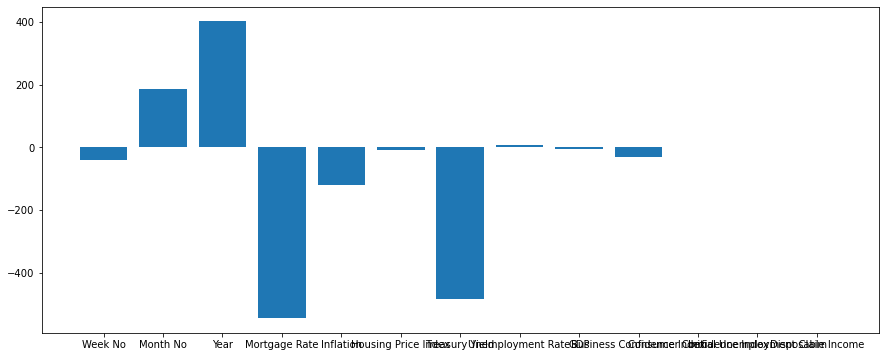

In [38]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

# predicting on test
linearreg_prediction = linearreg.predict(X_test)

# calculating R_square
R_squared = r2_score(linearreg_prediction,y_test)
print("R squared Error on test set : ", R_squared)


# Putting together the coefficient and their corresponding variable names
coefficient_df = pd.DataFrame()
coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value_lr'] = pd.Series(linearreg.coef_)
print(coefficient_df)
coefficient_df.to_csv('coeff_values.csv',index=False)
plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_lr"])


In [39]:
import pandas as pd

In [40]:
coefficient_df = pd.DataFrame()

In [41]:
coefficient_df["Column_Name"] = X_train.columns

In [42]:
coefficient_df

,Column_Name
0,Week No
1,Month No
2,Year
3,Mortgage Rate
4,Inflation
5,Housing Price Index
6,Treasury Yield
7,Unemployment Rate
8,GDP
9,Business Confidence Index


In [43]:
coefficient_df['Coefficient_Value'] = pd.Series(linearreg.coef_)
print(coefficient_df)

                   Column_Name  Coefficient_Value
0                      Week No             -40.51
1                     Month No             184.15
2                         Year             401.21
3                Mortgage Rate            -545.10
4                    Inflation            -122.13
5          Housing Price Index              -7.82
6               Treasury Yield            -483.38
7            Unemployment Rate               7.28
8                          GDP              -5.07
9    Business Confidence Index             -31.25
10   Consumer Confidence Index              -0.98
11  Initial Unemployment Claim               0.00
12           Disposable Income              -0.02


In [44]:
pd.Series(linearreg.coef_)

0     -40.51
1     184.15
2     401.21
3    -545.10
4    -122.13
5      -7.82
6    -483.38
7       7.28
8      -5.07
9     -31.25
10     -0.98
11      0.00
12     -0.02
dtype: float64

In [45]:
linearreg.intercept_

-799954.980142193

R squared Error on test set :  0.7232174592330614


<BarContainer object of 13 artists>

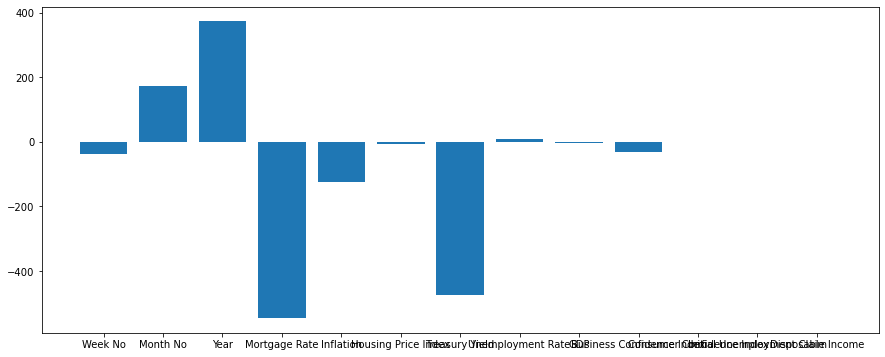

In [46]:
from sklearn.linear_model import Ridge

# Train the model
ridgeRegressor = Ridge(alpha = 0.5) #here setting alpha is nothing but lambda in the formula
ridgeRegressor.fit(X_train, y_train)
y_predicted_ridge = ridgeRegressor.predict(X_test)

# calculating R_square
R_squared = r2_score(y_predicted_ridge,y_test)
print("R squared Error on test set : ", R_squared)

coefficient_df['Coefficient_Value_ridge'] = pd.Series(ridgeRegressor.coef_)
#print(coefficient_df.head)
coefficient_df.to_csv('coeff_values.csv',index=False)
plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_ridge"])

R squared Error on test set :  0.722786681586266


C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+07, tolerance: 1.456e+04
  model = cd_fast.enet_coordinate_descent(


<BarContainer object of 13 artists>

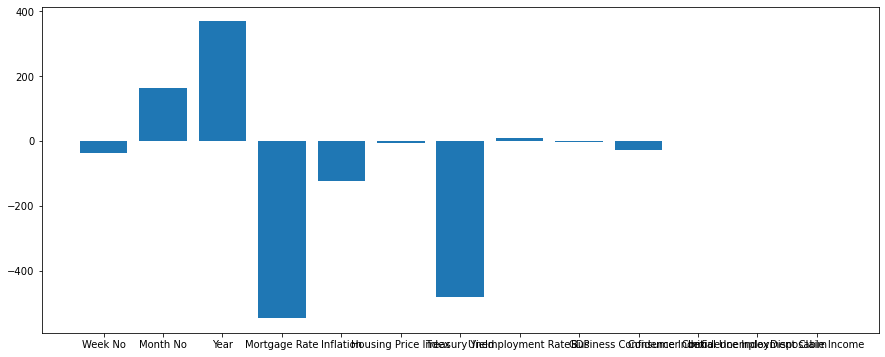

In [47]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lassoRegressor = Lasso(alpha = 1) #here setting alpha is nothing but lambda in the formula
lassoRegressor.fit(X_train, y_train)
y_predicted_lasso = lassoRegressor.predict(X_test)

# calculating Mean Squared Error (mse)
R_squared = r2_score(y_predicted_lasso,y_test)
print("R squared Error on test set : ", R_squared)

coefficient_df["Column_Name"] = X_train.columns
coefficient_df['Coefficient_Value_lasso'] = pd.Series(lassoRegressor.coef_)
#print(coefficient_df.head)
#coefficient_df.to_csv('coeff_values.csv',index=False)

plt.rcParams["figure.figsize"] = (15,6)
 
plt.bar(coefficient_df["Column_Name"],coefficient_df["Coefficient_Value_lasso"])

In [48]:
lasso_coeff_zero=[]

In [49]:
index = len(coefficient_df.Coefficient_Value_lasso)

In [50]:
index

13

In [51]:
i=0
while i<index:
    if coefficient_df.Coefficient_Value_lasso[i]==0:
        value=coefficient_df.Column_Name[i]
        lasso_coeff_zero.append(value)
    i=i+1
lasso_coeff_zero

[]

In [52]:
len(lasso_coeff_zero)

0

In [53]:
#Using Pearson Correlation

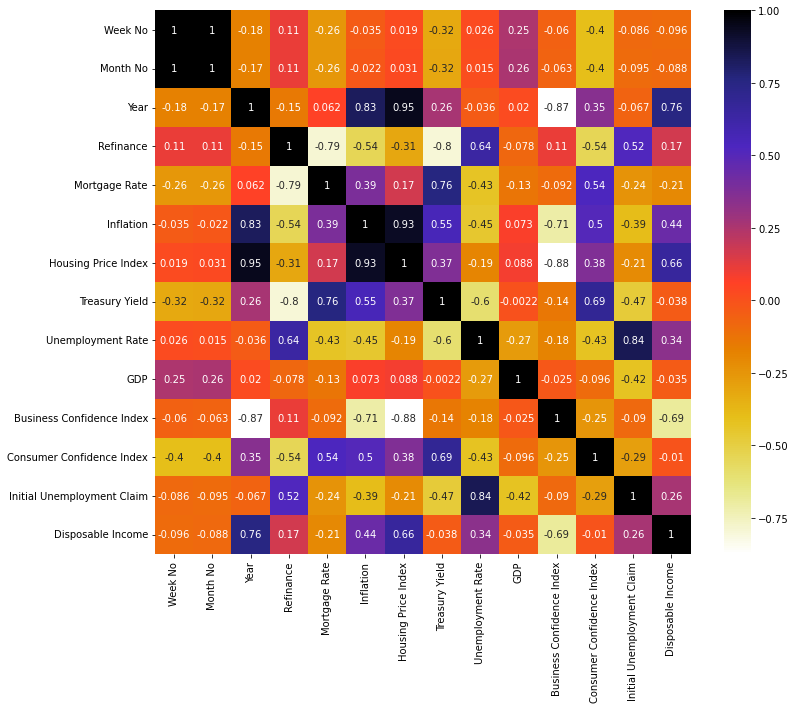

In [54]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = base_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation_check(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
corr_features = correlation_check(X_train, 0.8)
len(set(corr_features))

5

In [57]:
corr_features

{'Business Confidence Index',
 'Housing Price Index',
 'Inflation',
 'Initial Unemployment Claim',
 'Month No'}

In [58]:
base_data_upd = base_data.drop(corr_features,axis=1)

In [59]:
base_data.head(2)

,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
0,1,1,2019,885.00,4.51,1.60,187.90,1.70,4.00,2.40,101.01,101.00,329495.25,16027.80
1,2,1,2019,1094.00,4.51,1.60,187.90,2.16,4.00,2.40,101.01,101.00,348680.14,16027.80


In [60]:
base_data_upd.head(2)

,Week No,Year,Refinance,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,1,2019,885.00,4.51,1.70,4.00,2.40,101.00,16027.80
1,2,2019,1094.00,4.51,2.16,4.00,2.40,101.00,16027.80


In [62]:
x=base_data_upd.drop('Refinance',axis=1)
y=base_data_upd['Refinance']

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=24)

In [64]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(169, 8) (19, 8) (169,) (19,)


In [65]:
validation_table_train_upd = model_validation('train',X_train,X_test,y_train,y_test)

In [66]:
validation_table_train_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,330.47,187864.84,433.43,17.94,0.78
1,<class 'sklearn.linear_model._coordinate_desce...,330.43,187875.96,433.45,17.91,0.78
2,<class 'sklearn.linear_model._ridge.Ridge'>,330.63,187995.85,433.58,17.86,0.78
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,88.95,18077.27,134.45,4.52,0.98
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,103.95,27715.42,166.48,5.44,0.97


In [67]:
validation_table_test_upd = model_validation('test',X_train,X_test,y_train,y_test)

In [68]:
validation_table_test_upd

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,403.35,305567.28,552.78,26.49,0.78
1,<class 'sklearn.linear_model._coordinate_desce...,403.54,305902.52,553.08,26.47,0.78
2,<class 'sklearn.linear_model._ridge.Ridge'>,405.56,307771.89,554.77,26.51,0.78
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,343.53,293102.89,541.39,15.86,0.79
4,<class 'sklearn.ensemble._forest.RandomForestR...,320.82,252575.84,502.57,20.39,0.82
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,308.75,230397.91,480.00,15.91,0.83


In [69]:
from sklearn.preprocessing import StandardScaler
def StandardScaler_of_data(x,X_train,X_test):    
    if x=='train':
        print("runningin in training mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_train)
        dat1=pd.DataFrame(x)
        dat1.columns=X_train.columns
        data=dat1
    else:
        print("running in test mode")
        le=StandardScaler()
        le.fit(X_train)
        x=le.transform(X_test)
        dat1=pd.DataFrame(x)        
        dat1.columns=X_test.columns
        data=dat1
    return data

In [70]:
X_train_std = StandardScaler_of_data('train',X_train,X_test)

runningin in training mode


In [71]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
63,12,2020,3.36,1.15,4.40,-5.10,100.11,16444.30
185,29,2022,5.38,2.41,3.60,2.50,105.14,18423.06


In [72]:
X_train_std.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,-0.92,-0.31,-0.21,-0.83,-0.38,-0.61,-0.25,-0.99
1,0.23,1.60,2.63,1.79,-0.68,0.00,1.40,0.75


In [73]:
X_train.shape

(169, 8)

In [74]:
X_test_std = StandardScaler_of_data('test',X_train,X_test)

running in test mode


In [75]:
X_test.shape

(19, 8)

In [76]:
X_test.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
71,20,2020,3.26,0.97,13.20,-31.20,98.42,18024.00
54,3,2020,3.64,1.62,3.50,-5.10,101.64,16622.60


In [77]:
X_test_std.head(2) 

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
0,-0.38,-0.31,-0.35,-1.21,2.92,-2.72,-0.80,0.40
1,-1.53,-0.31,0.18,0.15,-0.71,-0.61,0.25,-0.83


In [78]:
validation_table_train_upd_new = model_validation('train',X_train_std,X_test_std,y_train,y_test)

In [79]:
validation_table_train_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,330.47,187864.84,433.43,17.94,0.78
1,<class 'sklearn.linear_model._coordinate_desce...,330.12,187876.92,433.45,17.90,0.78
2,<class 'sklearn.linear_model._ridge.Ridge'>,330.11,187877.47,433.45,17.89,0.78
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,0.00,0.00,0.00,0.00,1.00
4,<class 'sklearn.ensemble._forest.RandomForestR...,89.22,19906.77,141.09,4.66,0.98
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,110.67,28937.01,170.11,5.63,0.97


In [80]:
validation_table_test_upd_new = model_validation('test',X_train_std,X_test_std,y_train,y_test)

In [81]:
validation_table_test_upd_new

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.linear_model._base.LinearRegre...,403.35,305567.28,552.78,26.49,0.78
1,<class 'sklearn.linear_model._coordinate_desce...,402.47,305486.45,552.71,26.44,0.78
2,<class 'sklearn.linear_model._ridge.Ridge'>,402.34,306418.09,553.55,26.40,0.78
3,<class 'sklearn.tree._classes.DecisionTreeRegr...,396.26,391805.53,625.94,17.09,0.72
4,<class 'sklearn.ensemble._forest.RandomForestR...,305.16,248417.48,498.41,19.54,0.82
5,<class 'sklearn.ensemble._bagging.BaggingRegre...,286.09,230249.30,479.84,16.00,0.83


In [82]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [83]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-562840.0247436644


In [84]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+07, tolerance: 1.427e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+07, tolerance: 1.358e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\venkateshwarar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

{'alpha': 10}
-649175.4235134587


In [85]:
model = RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.9771591507970866
Test Accuracy: 0.8214628362731726


In [86]:
import pickle

In [87]:
# save the model to disk
filename = 'RF_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [88]:
X_train.head(2)

,Week No,Year,Mortgage Rate,Treasury Yield,Unemployment Rate,GDP,Consumer Confidence Index,Disposable Income
63,12,2020,3.36,1.15,4.40,-5.10,100.11,16444.30
185,29,2022,5.38,2.41,3.60,2.50,105.14,18423.06


In [89]:
X_train.columns

Index(['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income'],
      dtype='object')

In [90]:
future_data.head(2)

,Date,Week No,Month No,Year,Refinance,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income
188,2022-08-08,32,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06
189,2022-08-15,33,8,2022,NaN,5.41,9.10,274.25,2.38,3.60,2.50,96.60,105.14,213138.56,18423.06


In [91]:
pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]

In [92]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_model.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Purchase_Pred'] = y_pred
    
    return future_data

In [93]:
preds = predictions_on_future_data(future_data)

[755.96 755.96 755.96 755.96 755.96 755.96 755.96 755.96 755.96 755.96
 755.96 755.96 755.96]


C:\Users\venkateshwarar\AppData\Local\Temp\ipykernel_7724\3127893908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Purchase_Pred'] = y_pred


In [94]:
preds.to_excel("predictions_on_future_data.xlsx",index=False)

In [95]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,4,6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['mse','mae']
# Create the parameters grid

param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['mse', 'mae'], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False]}


In [96]:
from sklearn.model_selection import GridSearchCV
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [98]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [99]:
rf_tuned = RandomForestRegressor(n_estimators=10,criterion='mse',max_features='auto', max_depth=40,min_samples_split=6,min_samples_leaf=4,bootstrap=False,n_jobs=-1)

In [100]:
rf_tuned.fit(X_train, y_train)
print("Train Accuracy:",rf_tuned.score(X_train, y_train))
print("Test Accuracy:",rf_tuned.score(X_test, y_test))

Train Accuracy: 0.9178125351820737
Test Accuracy: 0.810985141029946


In [101]:
def model_validation_rf(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[RandomForestRegressor]
    for i in models:
        rd=i(n_estimators=10,criterion='mse',max_features='auto', max_depth=40,min_samples_split=6,min_samples_leaf=4,bootstrap=False,n_jobs=-1)
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [102]:
val_table_rf_train = model_validation_rf('train',X_train,X_test,y_train,y_test)

In [103]:
val_table_rf_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,172.55,70818.70,266.12,8.26,0.92


In [104]:
val_table_rf_test = model_validation_rf('test',X_train,X_test,y_train,y_test)

In [105]:
val_table_rf_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,303.90,259968.51,509.87,16.16,0.81


In [106]:
# save the model to disk
filename = 'RF_tuned.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [107]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_tuned.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Purchase_Pred'] = y_pred
    
    return future_data

In [108]:
preds_tuned = predictions_on_future_data(future_data)

[829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75
 829.75 829.75 829.75]


C:\Users\venkateshwarar\AppData\Local\Temp\ipykernel_7724\865268855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Purchase_Pred'] = y_pred


## Building XGBoost and doing Hyper Parameter Tuning

In [110]:
import xgboost as xgb
from xgboost import XGBRegressor

In [111]:
model = XGBRegressor()
model.fit(X_train,y_train)
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.9999977592651519
Test Accuracy: 0.8584494951984003


In [112]:
def model_validation_xgboost(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[RandomForestRegressor,XGBRegressor]
    for i in models:
        rd=i()
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [113]:
val_table_xgboost_train = model_validation_xgboost('train',X_train,X_test,y_train,y_test)
val_table_xgboost_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,83.88,16618.87,128.91,4.43,0.98
1,<class 'xgboost.sklearn.XGBRegressor'>,1.03,1.93,1.39,0.05,1.00


In [114]:
val_table_xgboost_test = model_validation_xgboost('test',X_train,X_test,y_train,y_test)
val_table_xgboost_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'sklearn.ensemble._forest.RandomForestR...,316.69,250862.48,500.86,19.84,0.82
1,<class 'xgboost.sklearn.XGBRegressor'>,290.38,194813.15,441.38,14.05,0.86


In [115]:
def hyperParameterTuning_xgboost(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01,0.05,0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.3,0.5,0.7],
        'colsample_bytree': [0.3,0.5,0.7],
        'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 90, num = 5)],
        'objective': ['reg:squarederror']
    }
    print(param_tuning)
    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [116]:
hyperParameterTuning_xgboost(X_train, y_train)

{'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5], 'subsample': [0.3, 0.5, 0.7], 'colsample_bytree': [0.3, 0.5, 0.7], 'n_estimators': [10, 30, 50, 70, 90], 'objective': ['reg:squarederror']}
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 90,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [117]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 10,
        min_child_weight = 1,
        n_estimators = 30,
        subsample = 0.7)

In [122]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test,y_test)], verbose=False)

C:\Users\venkateshwarar\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [133]:
print("Train Accuracy:",xgb_model.score(X_train, y_train))
print("Test Accuracy:",xgb_model.score(X_test, y_test))

Train Accuracy: 0.9352936777585095
Test Accuracy: 0.8502886893660478


In [124]:
def model_validation_xgboost(x,X_train,X_test,y_train,y_test):
    validation_table=[]
    models=[XGBRegressor]
    for i in models:
        rd=i(objective = 'reg:squarederror',
            colsample_bytree = 0.7,
            learning_rate = 0.1,
            max_depth = 10,
            min_child_weight = 1,
            n_estimators = 30,
            subsample = 0.7)               
        rd.fit(X_train,y_train)
        if x=="train":
            rd.predict(X_train)
            mae=mean_absolute_error(y_train.values,rd.predict(X_train))
            mse=mean_squared_error(y_train.values,rd.predict(X_train))
            rmse=np.sqrt(mean_squared_error(y_train.values,rd.predict(X_train)))
            mape=(((abs(y_train.values-rd.predict(X_train))/y_train.values)*100).sum())*(1/y_train.shape[0])
            rsquare=r2_score(y_train.values,rd.predict(X_train))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
        #validation_table=pd.DataFrame(validation_table_train)
        #validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
        else:
            rd.predict(X_test)
            mae=mean_absolute_error(y_test.values,rd.predict(X_test))
            mse=mean_squared_error(y_test.values,rd.predict(X_test))
            rmse=np.sqrt(mean_squared_error(y_test.values,rd.predict(X_test)))
            mape=(((abs(y_test.values-rd.predict(X_test))/y_test.values)*100).sum())*(1/y_test.shape[0])
            rsquare=r2_score(y_test.values,rd.predict(X_test))
            validation_table.append([i,mae,mse,rmse,mape,rsquare])
            
    validation_table=pd.DataFrame(validation_table)
    validation_table.columns=["model name","mae","mse","rmse","mape","rsquare"]
    return validation_table

In [125]:
val_table_xgboost_train = model_validation_xgboost('train',X_train,X_test,y_train,y_test)
val_table_xgboost_train

,model name,mae,mse,rmse,mape,rsquare
0,<class 'xgboost.sklearn.XGBRegressor'>,169.83,55755.67,236.13,6.59,0.94


In [126]:
val_table_xgboost_test = model_validation_xgboost('test',X_train,X_test,y_train,y_test)
val_table_xgboost_test

,model name,mae,mse,rmse,mape,rsquare
0,<class 'xgboost.sklearn.XGBRegressor'>,295.95,206044.71,453.92,14.22,0.85


In [127]:
# save the model to disk
filename = 'RF_tuned2.sav'
pickle.dump(rf_tuned, open(filename, 'wb'))

In [128]:
def predictions_on_future_data(future_data):
    pred_data = future_data[['Week No', 'Year', 'Mortgage Rate', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Consumer Confidence Index',
       'Disposable Income']]
    filename = 'RF_tuned.sav'
    rf_model = pickle.load(open(filename, 'rb'))
    y_pred = rf_model.predict(pred_data)
    print(y_pred)
    future_data['Refinance_Pred'] = y_pred
    
    return future_data

In [129]:
preds_tuned1 = predictions_on_future_data(future_data)

[829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75 829.75
 829.75 829.75 829.75]


C:\Users\venkateshwarar\AppData\Local\Temp\ipykernel_7724\1062656913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_data['Refinance_Pred'] = y_pred


In [130]:
# predictions on entire data
preds_tuned = predictions_on_future_data(d1)

[1048.25       1048.25       1048.25       1048.25       1048.25
 1191.155      1252.4        1252.4        1252.4        1252.4
 1252.4        1343.         1343.         1775.         1775.
 1804.5        1775.         1775.         1775.         1804.5
 1804.5        1804.5        2064.         2064.         2064.
 2064.         1951.         1951.         1951.         2064.
 1951.         2343.28571429 2462.75       2544.         2427.
 2462.75       2427.         2427.         2343.28571429 2544.
 2544.         2462.75       2544.         2343.28571429 2343.28571429
 2462.75       2343.28571429 1968.5        2493.         2493.
 2343.28571429 2343.28571429 1343.         2734.5        2734.5
 2734.5        2734.5        2734.5        2784.94       3064.71428571
 2860.6        3064.71428571 3064.71428571 2427.         3064.71428571
 4064.         4251.75       4251.75       4251.75       4251.75
 3828.25       3828.25       3276.         3166.25       3662.4
 3662.4        3276.   

In [131]:
preds_tuned1.to_excel("xgb_predictions_on_refinance_future_data2.xlsx", index=False)

In [132]:
preds_tuned.to_excel("xgb_predictions_on_refinance_entire_data3.xlsx", index=False)